In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
#import mysql.connector
import plotly
import plotly.plotly as py #library https://plot.ly/pandas/
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='zhenxu66', api_key='yZ5rrla4FGut06wbewMo')

In [49]:
df_allndlist= pd.read_csv('./csv/list_ndall_3051.csv')

In [50]:
df_allndlist.head(2)

,id,symbol,name,sector,industry,country,board,prof_marginPCT,ppe,marketCapMillion,...,fiftytwoWeekRange,PBR,PFCF,DEBTtoEquity,Beta,Volatility,2014to2013,2015to2014,2016to2015,2017to2016
0,1,FCCY,1st Constitution Bancorp,Financial,Regional - Northeast Banks,USA,[NASD],0.00,0.1566,172.62,...,16.15 - 27.00,0.014,0.0000,0.0114,0.0042,2.41% 3.79%,0.0000,0.0000,0.0000,0.0000
1,2,FLWS,"1-800-FLOWERS.COM, Inc.",Services,"Specialty Retail, Other",USA,[NASD],0.05,0.3302,900.03,...,8.85 - 15.00,0.028,0.2671,0.0033,0.0117,5.96% 6.22%,0.3854,0.8177,0.1943,-0.0738


In [62]:
print('This is the columns name list:\n')
print(df_allndlist.columns)
#df_allndlist.info()
#print(df_allndlist[(df_allndlist['symbol']=='INTC')])

This is the columns name list:

Index(['id', 'symbol', 'name', 'sector', 'industry', 'country', 'board',
       'prof_marginPCT', 'ppe', 'marketCapMillion', 'descShort', 'url_reuter',
       'url_marketwatch', 'ipo_year', 'url', 'EPS', 'insideOwnPCT',
       'forwardPPE', 'nextYEPS', 'insideOwnTrans6monthPCT', 'instOwnPCT',
       'thisYearGrowthEPSPCT', 'instOwnTrans3monthPCT', 'nextYearGrowthEPSPCT',
       'ROAPCT', 'ROEPCT', 'dividAnn', 'ROIPCT', 'dividYieldAnnPCT',
       'dividPayoutRatioPCT', 'avgVolumn3MonthMillion', 'priceNow',
       'recomm1buy5sell', 'SMA20PCT', 'SMA50PCT', 'SMA200PCT', 'relVolumn',
       'PEG', 'PSR', 'fiftytwoWeekRange', 'PBR', 'PFCF', 'DEBTtoEquity',
       'Beta', 'Volatility', '2014to2013', '2015to2014', '2016to2015',
       '2017to2016'],
      dtype='object')


C:\Users\zxu\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:1424: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



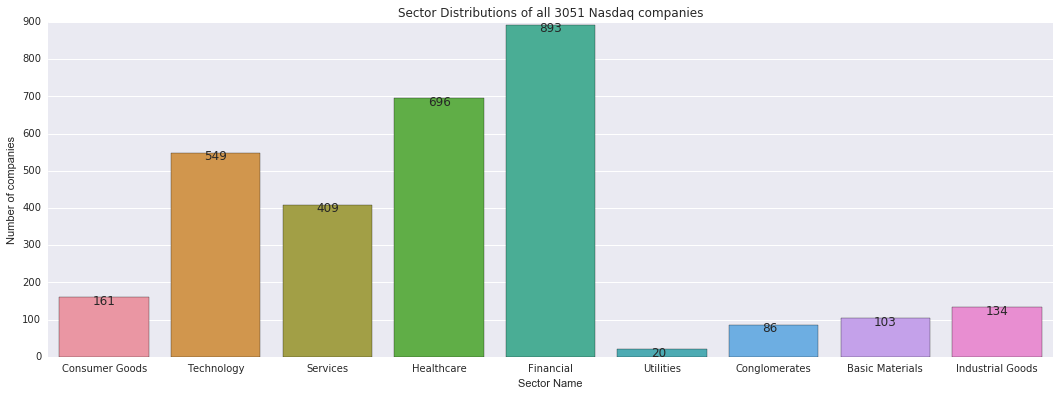

In [129]:
plt.figure(figsize=(18,6))
ax = sns.countplot(x='sector',data=df_allndlist.sort_values(by=['marketCapMillion'],ascending=False))
plt.title('Sector Distributions of all ' + str(len (df_allndlist)) +' Nasdaq companies')
plt.xlabel('Sector Name')
plt.ylabel('Number of companies')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()-20))

#sns.countplot(y='sector',data=df_allndlist)

C:\Users\zxu\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:1424: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



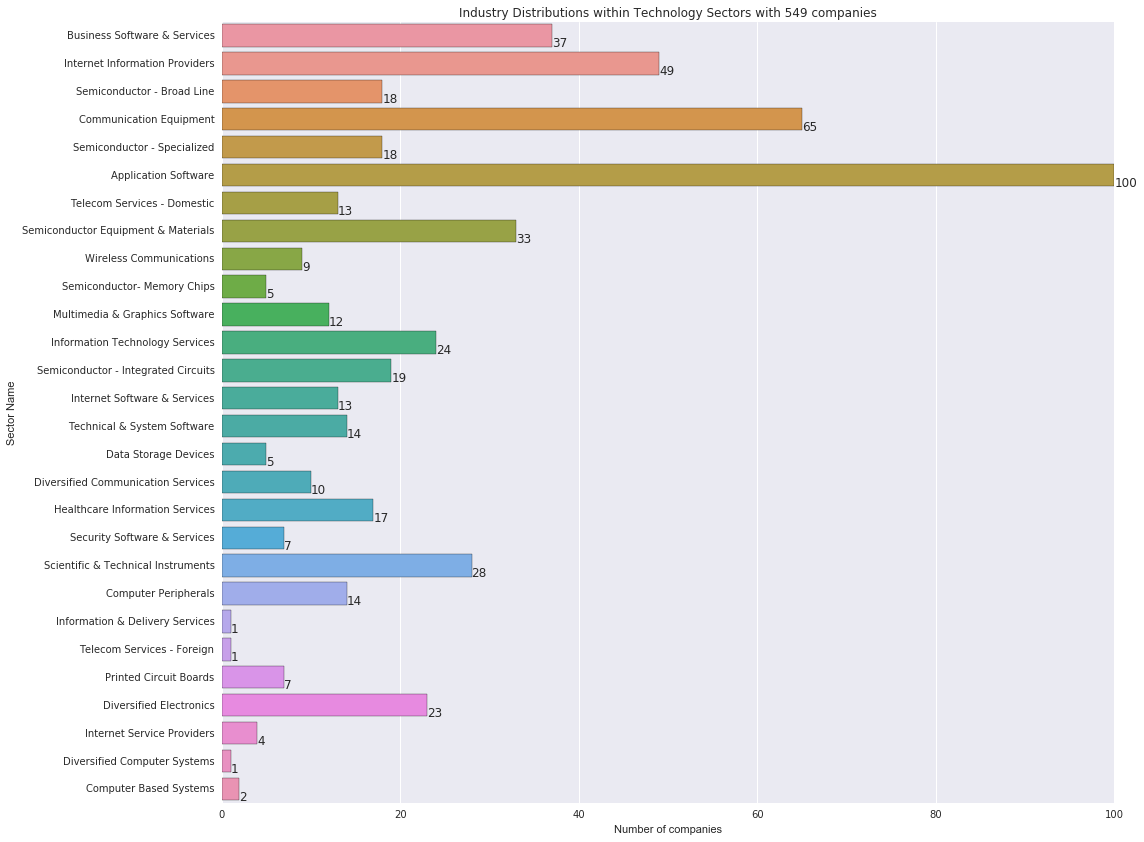

In [128]:
industry = 'Technology'
df_sector = df_allndlist[df_allndlist['sector']==industry]
plt.figure(figsize=(16,14))
ay = sns.countplot(y='industry',data=df_sector.sort_values(by=['marketCapMillion'],ascending=False))
plt.title('Industry Distributions within '+industry+' Sectors with '+str(len(df_sector))+' companies')
plt.xlabel('Number of companies')
plt.ylabel('Sector Name')
# https://matplotlib.org/api/_as_gen/matplotlib.patches.Rectangle.html
for p in ay.patches:
        ay.annotate('{:.0f}'.format(p.get_width()), (p.get_width(), p.get_y()+0.8))

#sns.countplot(y='sector',data=df_allndlist)

81


C:\Users\zxu\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:1424: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



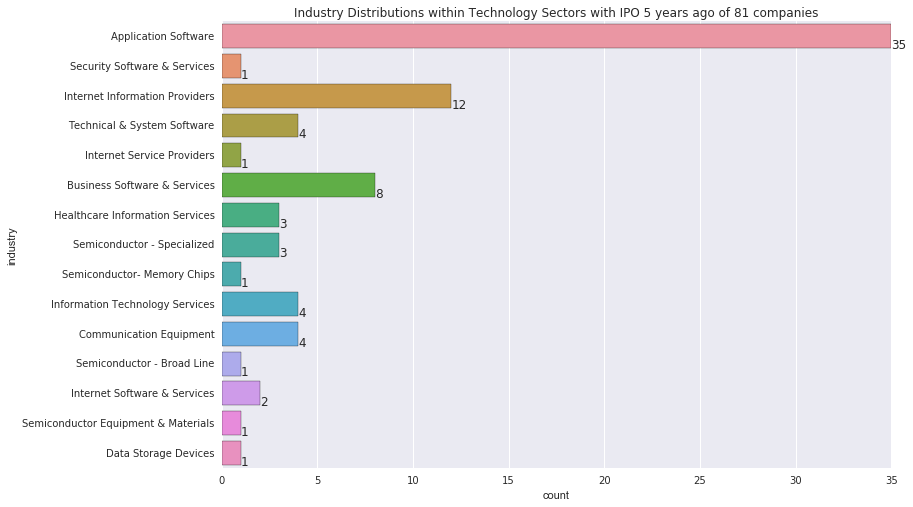

In [138]:
df_sector_recent_5year = df_allndlist[(df_allndlist['ipo_year']>2013)
                                     & (df_allndlist['marketCapMillion']>200) &  (df_allndlist['sector']=='Technology')]
print(len(df_sector_recent_5year.sort_values(by=['marketCapMillion'],ascending=False)))  

plt.figure(figsize=(12,8))
plt.title('Industry Distributions within '+industry+' Sectors with IPO 5 years ago of '+str(len(df_sector_recent_5year))+' companies')

ay = sns.countplot(y='industry',data=df_sector_recent_5year)
for p in ay.patches:
        ay.annotate('{:.0f}'.format(p.get_width()), (p.get_width(), p.get_y()+0.8))


13
['Weibo Corporation', 'The Trade Desk, Inc.', 'Sunrun Inc.', 'SolarEdge Technologies, Inc.', 'SMART Global Holdings, Inc.', 'Sabre Corporation', 'Quantenna Communications, Inc.', 'Presidio, Inc.', 'Paylocity Holding Corporation', 'Momo Inc.', 'Ichor Holdings, Ltd.', 'HealthEquity, Inc.', 'Five9, Inc.']
['WB', 'TTD', 'RUN', 'SEDG', 'SGH', 'SABR', 'QTNA', 'PSDO', 'PCTY', 'MOMO', 'ICHR', 'HQY', 'FIVN']


C:\Users\zxu\AppData\Local\Continuum\Anaconda3\lib\site-packages\seaborn\categorical.py:1424: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



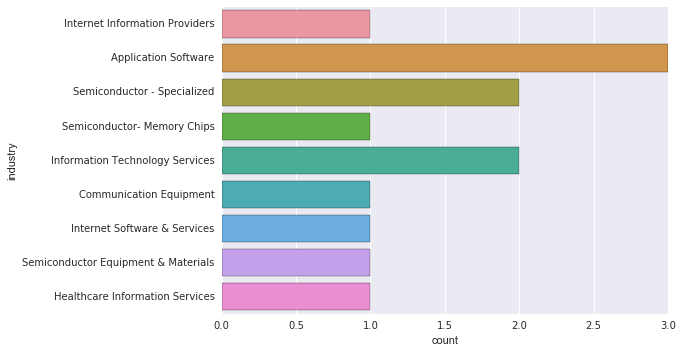

In [140]:
threhold = 0

df_allndlist_good_recent_5_good = df_sector_recent_5year[(df_sector_recent_5year['2015to2014']>threhold)
                                     & (df_sector_recent_5year['2016to2015']>threhold) 
                                     & (df_sector_recent_5year['2017to2016']>threhold)]
print(len(df_allndlist_good_recent_5_good.sort_values(by=['marketCapMillion'])))
if len(df_allndlist_good_recent_5_good)<1:
    print(df_allndlist_good_recent_5_good.sort_values(by=['marketCapMillion'],ascending=False))
else:
    print(df_allndlist_good_recent_5_good.name.tolist())
    print(df_allndlist_good_recent_5_good.symbol.tolist())
sns.countplot(y='industry',data=df_allndlist_good_recent_5_good)

In [25]:
df_allndlist_25 = df_allndlist[(df_allndlist['2015to2014']>0.25)
                                     & (df_allndlist['2016to2015']>0.25) & (df_allndlist['2017to2016']>0.25)]
print('Total stocks that satisfy four year continous NIGR>25%:'+str(len(df_allndlist_25))+ ' out of '
      +str(len(df_allndlist))+ ' total nasdaq stock that IPO before 2014'+'\n' )
if len(df_allndlist_25)<10:
    print(df_allndlist_25)
else:
    print(df_allndlist_25.name.tolist())
    print(df_allndlist_25.symbol.tolist())

Total stocks that satisfy four year continous NIGR>25%:102 out of 3051 total nasdaq stock that IPO before 2014

['Weibo Corporation', 'U.S. Auto Parts Network, Inc.', 'Tucows Inc.', 'Truett-Hurst, Inc.', 'Tristate Capital Holdings, Inc.', 'TPI Composites, Inc.', 'T-Mobile US, Inc.', 'The Trade Desk, Inc.', 'The Hackett Group, Inc.', 'Tecogen Inc.', 'Take-Two Interactive Software, Inc.', 'Sunrun Inc.', 'Spark Energy, Inc.', 'Spark Energy, Inc.', 'SolarEdge Technologies, Inc.', 'SMART Global Holdings, Inc.', 'Shutterfly, Inc.', 'Seacoast Banking Corporation of Florida', 'Schnitzer Steel Industries, Inc.', 'ReTo Eco-Solutions, Inc.', 'Regeneron Pharmaceuticals, Inc.', 'Qurate Retail, Inc.', 'Qurate Retail, Inc.', 'Quantenna Communications, Inc.', 'Qualstar Corporation', 'PRGX Global, Inc.', 'Presidio, Inc.', 'Pinnacle Financial Partners, Inc.', 'Penn National Gaming, Inc.', 'Peapack-Gladstone Financial Corporation', 'Paylocity Holding Corporation', 'Patrick Industries, Inc.', 'Pacific Pre

In [8]:
def plot_df_industry_symbols(df, sector):
    df_sector = df[df['sector']==sector]
    def industry_merge_company(industry):
        df_sector_industry = df_sector[df_sector['industry']==industry]
        return df_sector_industry['symbol'].str.cat(sep=',')
    
    value_counts = df_sector['industry'].value_counts()
    df_industry = value_counts.rename_axis('industry').reset_index(name='counts')
    df_industry['symbols'] = df_industry['industry'].apply(industry_merge_company)
    trace = go.Pie(labels=df_industry['industry'], values=df_industry['counts'], text = df_industry.symbols, textinfo='label+value')
    return trace

def df_industry_symbols(df, sector):
    df_sector = df[df['sector']==sector]
    def industry_merge_company(industry):
        df_sector_industry = df_sector[df_sector['industry']==industry]
        return df_sector_industry['symbol'].str.cat(sep=',')
    
    value_counts = df_sector['industry'].value_counts()
    df_industry = value_counts.rename_axis('industry').reset_index(name='counts')
    df_industry['symbols'] = df_industry['industry'].apply(industry_merge_company)
    return df_industry
trace_25 = plot_df_industry_symbols(df_allndlist,'Technology')
py.iplot([trace_25],filename='basic_pie_chart')

In [9]:
len(df_industry_symbols(df_allndlist,'Technology'))

28

In [11]:
#df_industry_symbols(df_allndlist_25,'Technology')
#df_industry_symbols(df_allndlist,'Technology')
#merge two plots together
fig = {
  "data": [
    {
      "values": df_industry_symbols(df_allndlist_25,'Technology')['counts'].tolist(),
      "labels": df_industry_symbols(df_allndlist_25,'Technology')['industry'].tolist(),
      "text":   df_industry_symbols(df_allndlist_25,'Technology').symbols.tolist(),
      "domain": {"x": [0, .48]},
      "name": "NIRG >25%",
      "hoverinfo":"label+percent+name+text",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": df_industry_symbols(df_allndlist,'Technology')['counts'].tolist(),
      "labels": df_industry_symbols(df_allndlist,'Technology')['industry'].tolist(),
      "text":   df_industry_symbols(df_allndlist,'Technology').symbols.tolist(),
      "textposition":"none",
      "domain": {"x": [.52, 1]},
      "name": "All Nasdaq",
      "hoverinfo":"label+percent+name+text",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Technology Section Compare",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "NIRG >25%"+'\n'+str(len(df_industry_symbols(df_allndlist_25,'Technology'))),
                "x": 0.15,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "All Nasdaq"+'\n'+str(len(df_industry_symbols(df_allndlist,'Technology'))),
                "x": 0.85,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

C:\Users\zxu\AppData\Local\Continuum\Anaconda3\lib\site-packages\plotly\tools.py:1428: UserWarning:

Looks like you used a newline character: '\n'.

Plotly uses a subset of HTML escape characters
to do things like newline (<br>), bold (<b></b>),
italics (<i></i>), etc. Your newline characters 
have been converted to '<br>' so they will show 
up right on your Plotly figure!



In [22]:
def sector_plot(sector):
    fig = {
      "data": [
        {
          "values": df_industry_symbols(df_allndlist_25,sector)['counts'].tolist(),
          "labels": df_industry_symbols(df_allndlist_25,sector)['industry'].tolist(),
          "text":   df_industry_symbols(df_allndlist_25,sector).symbols.tolist(),
          "domain": {"x": [0, .48]},
          "name": "NIRG >25%",
          "hoverinfo":"label+percent+name+text",
          "hole": .4,
          "type": "pie"
        },
        {
          "values": df_industry_symbols(df_allndlist,sector)['counts'].tolist(),
          "labels": df_industry_symbols(df_allndlist,sector)['industry'].tolist(),
          "text":   df_industry_symbols(df_allndlist,sector).symbols.tolist(),
          "textposition":"none",
          "domain": {"x": [.52, 1]},
          "name": "All Nasdaq",
          "hoverinfo":"label+percent+name+text",
          "hole": .4,
          "type": "pie"
        }],
      "layout": {
            "title":"Services Section Compare",
            "annotations": [
                {
                    "font": {
                        "size": 20
                    },
                    "showarrow": False,
                    "text": "NIRG >25%"+'\n'+str(len(df_industry_symbols(df_allndlist_25,sector))),
                    "x": 0.15,
                    "y": 0.5
                },
                {
                    "font": {
                        "size": 20
                    },
                    "showarrow": False,
                    "text": "All Nasdaq"+'\n'+str(len(df_industry_symbols(df_allndlist,sector))),
                    "x": 0.85,
                    "y": 0.5
                }
            ]
        }
    }
    return fig
py.iplot(sector_plot('Technology'), filename='donut')

C:\Users\zxu\AppData\Local\Continuum\Anaconda3\lib\site-packages\plotly\tools.py:1428: UserWarning:

Looks like you used a newline character: '\n'.

Plotly uses a subset of HTML escape characters
to do things like newline (<br>), bold (<b></b>),
italics (<i></i>), etc. Your newline characters 
have been converted to '<br>' so they will show 
up right on your Plotly figure!



In [23]:
data_ipo_year = [go.Histogram(
        x=df_allndlist['ipo_year'],
        name='all',
        marker=dict(
            color='#FFD7E9',
        ),
        opacity=0.75
    ),
               go.Histogram(
        x=df_allndlist_25['ipo_year'],
        name='NIGR>25',
        marker=dict(
            color='#EB89B5',
        ),
        opacity=0.75
    ),
           ]

layout = go.Layout(
    title='ipo_year hist Results',
    xaxis=dict(
        title='ipo_year',
    ),
    yaxis=dict(
        title='Count',
        automargin=True,
        type = 'log'
    ),
    bargap=0.2,
    bargroupgap=0.1,
    autosize=True

)
fig = go.Figure(data=data_ipo_year, layout=layout)
py.iplot(fig, filename='styled histogram')

In [24]:
data_country = [go.Histogram(
        x=df_allndlist['country'],
        name='all',
        marker=dict(
            color='#FFD7E9',
        ),
        opacity=0.75
    ),
               go.Histogram(
        x=df_allndlist_25['country'],
        name='NIGR>25',
        marker=dict(
            color='#EB89B5',
        ),
        opacity=0.75
    ),
           ]

layout = go.Layout(
    title='country hist Results',
    xaxis=dict(
        title='country',
    ),
    yaxis=dict(
        title='Count',
        automargin=True,
        type ='log'
    ),
    bargap=0.2,
    bargroupgap=0.1,
    autosize=True

)
fig = go.Figure(data=data_country, layout=layout)
py.iplot(fig, filename='styled histogram')

In [25]:
df_industry_sum = df_allndlist.groupby('industry').marketCapMillion.agg('sum')
print('Total # of industries: '+ str(len(df_industry_sum))+ '\n')
print(df_industry_sum.sort_values(ascending=False)[:30])

#df_allndlist_25.groupby('industry').marketCapMillion.agg('sum')

Total # of industries: 199

industry
Internet Information Providers         2151592.39
Electronic Equipment                   1060722.88
Business Software & Services           1029620.35
Biotechnology                           924046.09
Catalog & Mail Order Houses             855896.20
Semiconductor - Broad Line              544566.00
Application Software                    417224.51
Communication Equipment                 385937.70
CATV Systems                            311919.93
Entertainment - Diversified             290403.41
Business Services                       217370.64
Semiconductor Equipment & Materials     207602.33
Beverages - Soft Drinks                 205230.00
Medical Instruments & Supplies          176791.88
Credit Services                         162683.14
Semiconductor - Specialized             150074.81
Specialty Retail, Other                 146558.08
Investment Brokerage - National         133950.01
Discount, Variety Stores                132564.40
Asset Managem

In [26]:
df_industry_25_sum = df_allndlist_25.groupby('industry').marketCapMillion.agg('sum')
print('Total # of industries: '+ str(len(df_industry_25_sum))+ '\n')
print(df_industry_25_sum.sort_values(ascending=False)[:30])

#df_allndlist_25.groupby('industry').marketCapMillion.agg('sum')

Total # of industries: 63

industry
Catalog & Mail Order Houses              839600.00
Internet Information Providers           438553.55
Application Software                     131050.05
Wireless Communications                   59490.00
Biotechnology                             47818.77
Semiconductor Equipment & Materials       24000.78
Healthcare Information Services           15610.00
CATV Systems                              15500.00
Specialty Retail, Other                   14995.61
Multimedia & Graphics Software            13620.00
Broadcasting - TV                         12710.00
Medical Instruments & Supplies            12689.24
Lodging                                    7600.00
Internet Software & Services               7370.00
Regional - Southeast Banks                 5970.00
Discount, Variety Stores                   5780.00
Scientific & Technical Instruments         4940.00
Semiconductor - Specialized                3788.91
Gaming Activities                          352

In [27]:
fig = {
    'data': [
        {
            'x': df_allndlist_25['ppe'], 
            'y': df_allndlist_25['marketCapMillion'], 
            'text': df_allndlist_25.symbol + ' name:'+ df_allndlist_25.name,  #cannot access columns with '' '' 
            'mode': 'markers', #+text
            'marker':dict(
                size= 8, #30*df_allnd100list['inst_own'],
                color = df_allndlist_25['recomm1buy5sell'], #set color equal to a variable
                colorscale='Viridis',
                showscale=True
            ),
            'name': 'Results'},      

    ],
    'layout': {
        'title': 'market_volumn compared with price per earnings and profit_margin (%)',
        'xaxis': {'title': 'price per earnings','autorange':True,'type': 'log'},
        'yaxis': {'title': "mark_volumn",'autorange':True,'type': 'log'},
        'showlegend': True,
        'annotations':[ #not working
            dict(
                x=1100,#df_allnd100list[df_allnd100list.symbol=='AAPL']['mark_cap(billion)'].item(),
                y=4800,#df_allnd100list[df_allnd100list.symbol=='AAPL']['shares_out(million)'].item(),
                xref='x',
                yref='y',
                text='dict Text is here',
                showarrow=True,
                arrowhead=7,
                ax=0,
                ay=-40
            ),
        ]
    }
}

In [28]:
py.iplot(fig, filename='scatter')  #py.plot will generate a webpage

In [29]:
column_PCT=[]
for i in df_allndlist_25.columns.tolist():
    if i[-3:]=='PCT':
        column_PCT.append(i)
print(df_allndlist_25.columns.tolist())
print(column_PCT)


['id', 'symbol', 'name', 'sector', 'industry', 'country', 'board', 'prof_marginPCT', 'ppe', 'marketCapMillion', 'descShort', 'url_reuter', 'url_marketwatch', 'ipo_year', 'url', 'EPS', 'insideOwnPCT', 'forwardPPE', 'nextYEPS', 'insideOwnTrans6monthPCT', 'instOwnPCT', 'thisYearGrowthEPSPCT', 'instOwnTrans3monthPCT', 'nextYearGrowthEPSPCT', 'ROAPCT', 'ROEPCT', 'dividAnn', 'ROIPCT', 'dividYieldAnnPCT', 'dividPayoutRatioPCT', 'avgVolumn3MonthMillion', 'priceNow', 'recomm1buy5sell', 'SMA20PCT', 'SMA50PCT', 'SMA200PCT', 'relVolumn', 'PEG', 'PSR', 'fiftytwoWeekRange', 'PBR', 'PFCF', 'DEBTtoEquity', 'Beta', 'Volatility', '2014to2013', '2015to2014', '2016to2015', '2017to2016']
['prof_marginPCT', 'insideOwnPCT', 'insideOwnTrans6monthPCT', 'instOwnPCT', 'thisYearGrowthEPSPCT', 'instOwnTrans3monthPCT', 'nextYearGrowthEPSPCT', 'ROAPCT', 'ROEPCT', 'ROIPCT', 'dividYieldAnnPCT', 'dividPayoutRatioPCT', 'SMA20PCT', 'SMA50PCT', 'SMA200PCT']


In [30]:
group = df_allndlist_25.columns.to_series().groupby(df_allndlist_25.dtypes).groups
dict_group = {k.name: v for k, v in group.items()}
float_column = dict_group.get('float64').tolist()
print(float_column)

['prof_marginPCT', 'ppe', 'marketCapMillion', 'EPS', 'insideOwnPCT', 'forwardPPE', 'nextYEPS', 'insideOwnTrans6monthPCT', 'instOwnPCT', 'thisYearGrowthEPSPCT', 'instOwnTrans3monthPCT', 'nextYearGrowthEPSPCT', 'ROAPCT', 'ROEPCT', 'dividAnn', 'ROIPCT', 'dividYieldAnnPCT', 'dividPayoutRatioPCT', 'avgVolumn3MonthMillion', 'priceNow', 'recomm1buy5sell', 'SMA20PCT', 'SMA50PCT', 'SMA200PCT', 'relVolumn', 'PEG', 'PSR', 'PBR', 'PFCF', 'DEBTtoEquity', 'Beta', '2014to2013', '2015to2014', '2016to2015', '2017to2016']


In [31]:
df_allndlist_25_float= df_allndlist_25[float_column]
df_allndlist_25_float.corr()['priceNow'].sort_values(ascending = False)

priceNow                   1.000000
marketCapMillion           0.889199
nextYEPS                   0.763160
EPS                        0.594718
forwardPPE                 0.365136
avgVolumn3MonthMillion     0.260587
ppe                        0.260392
PBR                        0.226999
Beta                       0.099855
SMA200PCT                  0.097993
instOwnPCT                 0.071783
PFCF                       0.064389
recomm1buy5sell            0.055904
ROEPCT                     0.049859
2015to2014                 0.034413
2014to2013                 0.031983
dividAnn                   0.029032
PSR                        0.021898
PEG                        0.017047
SMA20PCT                   0.014945
ROAPCT                     0.003235
SMA50PCT                  -0.002774
relVolumn                 -0.005403
insideOwnPCT              -0.006203
insideOwnTrans6monthPCT   -0.006584
DEBTtoEquity              -0.019637
2016to2015                -0.024455
instOwnTrans3monthPCT     -0

In [38]:
group = df_allndlist.columns.to_series().groupby(df_allndlist.dtypes).groups
dict_group = {k.name: v for k, v in group.items()}
float_column = dict_group.get('float64').tolist()
#print(float_column)
df_allndlist_float= df_allndlist[float_column]
df_allndlist_float.corr()['priceNow'].sort_values(ascending = False)

priceNow                   1.000000
nextYEPS                   0.723199
marketCapMillion           0.504105
dividAnn                   0.221048
prof_marginPCT             0.161146
SMA200PCT                  0.145505
ROAPCT                     0.141306
instOwnPCT                 0.141167
EPS                        0.115693
SMA50PCT                   0.079350
ROEPCT                     0.078904
SMA20PCT                   0.074486
forwardPPE                 0.063554
ppe                        0.055682
avgVolumn3MonthMillion     0.053753
ROIPCT                     0.052175
thisYearGrowthEPSPCT       0.049318
recomm1buy5sell            0.045423
2015to2014                 0.032536
PEG                        0.031563
Beta                       0.031484
2014to2013                 0.021520
dividPayoutRatioPCT        0.021223
PFCF                       0.020378
2016to2015                 0.003352
2017to2016                 0.000565
PBR                       -0.001155
relVolumn                 -0

In [32]:
df_allndlist_25_PCT= df_allndlist_25[column_PCT]

In [33]:
#df_allndlist_25_PCT.corr()

In [34]:
df_allndlist_25_PCT.corr()['SMA20PCT'].sort_values(ascending = False)

SMA20PCT                   1.000000
SMA50PCT                   0.815008
SMA200PCT                  0.365499
insideOwnPCT               0.226991
ROIPCT                     0.103665
ROAPCT                     0.098186
nextYearGrowthEPSPCT       0.075079
ROEPCT                     0.073216
insideOwnTrans6monthPCT    0.055187
dividPayoutRatioPCT        0.004675
prof_marginPCT            -0.033893
instOwnPCT                -0.051026
dividYieldAnnPCT          -0.055846
instOwnTrans3monthPCT     -0.161374
thisYearGrowthEPSPCT      -0.211005
Name: SMA20PCT, dtype: float64

In [35]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(df_allndlist_25_PCT,figsize= (16,12),alpha=0.3)

In [36]:
data_industry = [go.Histogram(
        y=df_allndlist_25['industry'])
           ]

layout = go.Layout(
    title='industry hist Results',
    xaxis=dict(
        title='Count',
        type ='log'
    ),
    yaxis=dict(
        title='industry',
        automargin=True
    ),
    bargap=0.2,
    autosize=False,
    width=1000,
    height=2000,
    margin=go.layout.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),

)
fig = go.Figure(data=data_industry, layout=layout)
py.iplot(fig, filename='styled histogram')

In [39]:
data_industry = [go.Histogram(
        y=df_allndlist['industry'])
           ]

layout = go.Layout(
    title='industry hist Results',
    xaxis=dict(
        title='Count',
        type ='log'
    ),
    yaxis=dict(
        title='industry',
        automargin=True
    ),
    bargap=0.2,
    autosize=False,
    width=1000,
    height=2000,
    margin=go.layout.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),

)
fig = go.Figure(data=data_industry, layout=layout)
py.iplot(fig, filename='styled histogram')